In [1]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#scaling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Data Loading

In [3]:
#lets import the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print('Shape of train dataset:',train.shape)
print('Shape of test dataset:',test.shape)

Shape of train dataset: (1168, 81)
Shape of test dataset: (292, 80)


In [5]:
#lets add source column to train and test dataset
train["source"] = "train"
test["source"] = "test"

In [6]:
#lets combine both the datasets
df = pd.concat([train,test],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455    83          20       RL         78.0    10206   Pave   NaN      Reg   
1456  1048          20       RL         57.0     9245   Pave   NaN      IR2   
1457    17          20       RL          NaN    11241   Pave   NaN      IR1   
1458   523          50       RM         50.0     5000   Pave   NaN      Reg   
1459  1379         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1            Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
2            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
3            Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   
4            Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1456         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1457         Lvl    AllPub  ...    NaN    NaN        Shed     700      3   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   
1459         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice  source  
0      2007       WD         Normal   128000.0   train  
1      2007       WD         Normal   268000.0   train  
2      2007       WD         Normal   269790.0   train  
3      2010      COD         Normal   190000.0   train  
4      2009       WD         Normal   215000.0   train  
...     ...      ...            ...        ...     ...  
1455   2008       WD         Normal        NaN    test  
1456   2008       WD         Normal        NaN    test  
1457   2010       WD         Normal        NaN    test  
1458   2006       WD         Normal        NaN    test  
1459   2006       WD         Normal        NaN    test  

[1460 rows x 82 columns]

In [7]:
#Checking for Missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

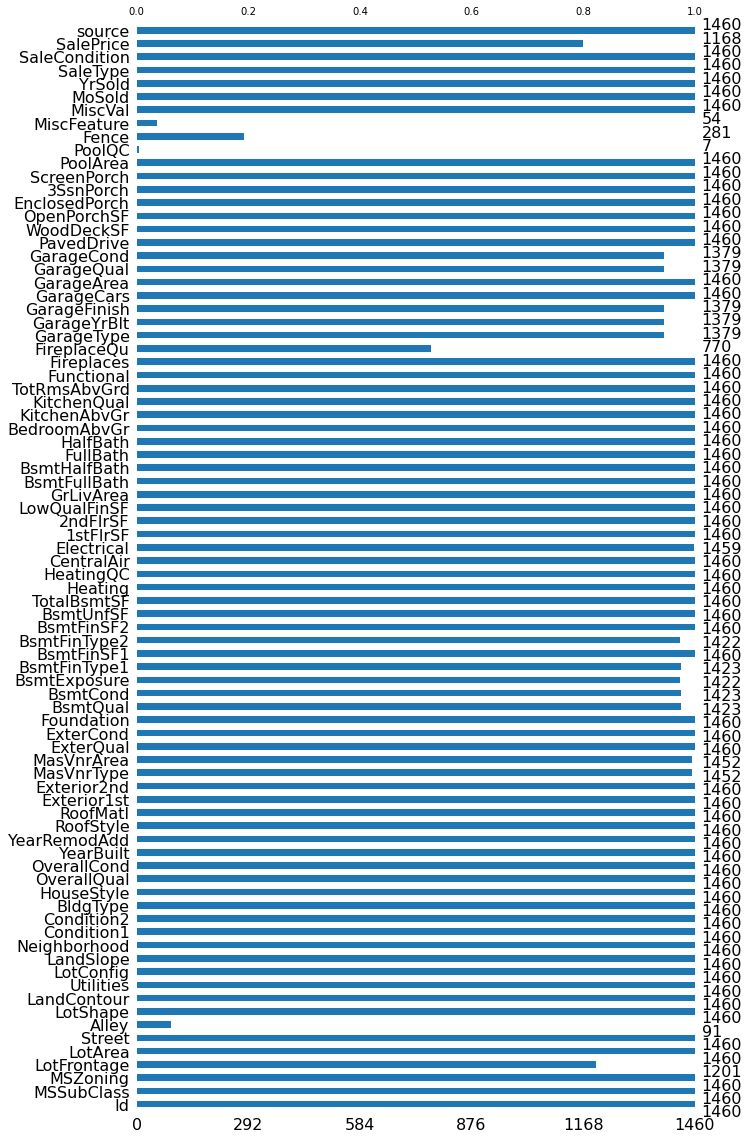

In [9]:
missingno.bar(df, figsize = (10,20), color="tab:blue")

In [10]:
df['Id'].value_counts()

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

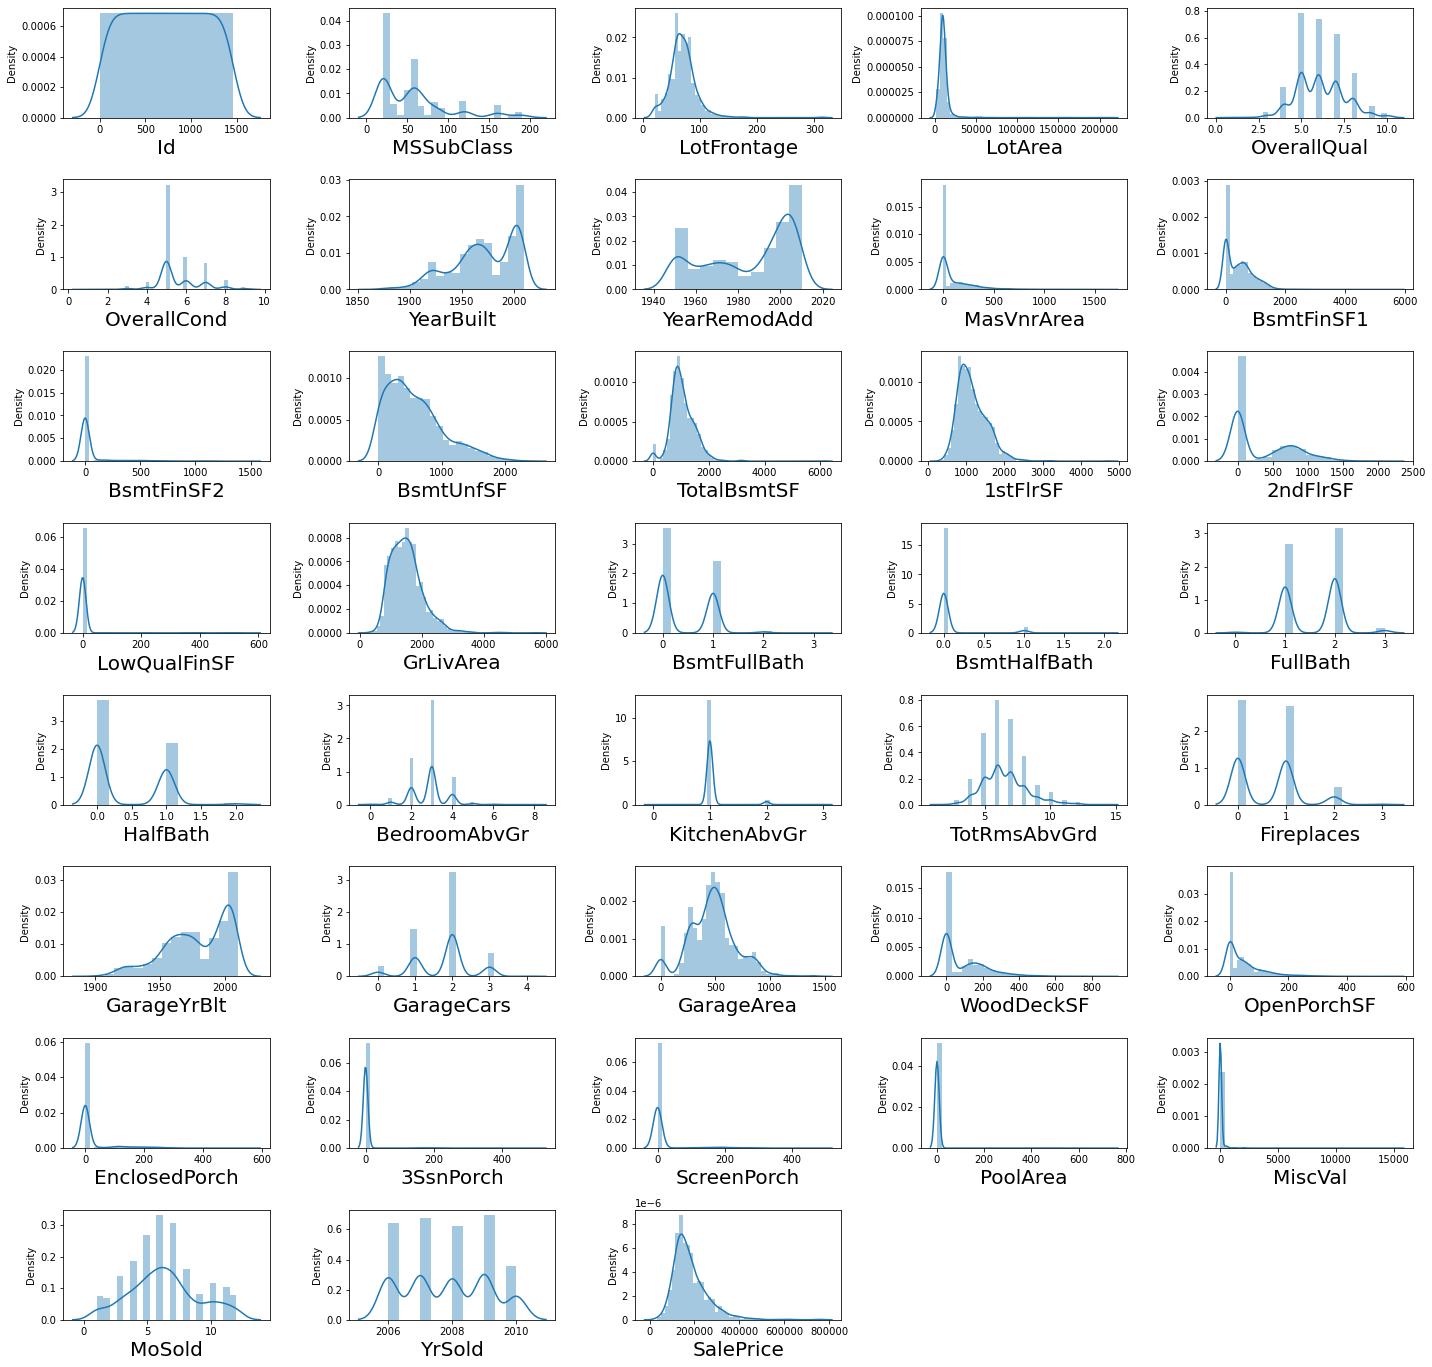

In [11]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=81:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [12]:
for col in num_data.columns:
    print(col,df[col].nunique())
    print('-'*20)

Id 1460
--------------------
MSSubClass 15
--------------------
LotFrontage 110
--------------------
LotArea 1073
--------------------
OverallQual 10
--------------------
OverallCond 9
--------------------
YearBuilt 112
--------------------
YearRemodAdd 61
--------------------
MasVnrArea 327
--------------------
BsmtFinSF1 637
--------------------
BsmtFinSF2 144
--------------------
BsmtUnfSF 780
--------------------
TotalBsmtSF 721
--------------------
1stFlrSF 753
--------------------
2ndFlrSF 417
--------------------
LowQualFinSF 24
--------------------
GrLivArea 861
--------------------
BsmtFullBath 4
--------------------
BsmtHalfBath 3
--------------------
FullBath 4
--------------------
HalfBath 3
--------------------
BedroomAbvGr 8
--------------------
KitchenAbvGr 4
--------------------
TotRmsAbvGrd 12
--------------------
Fireplaces 4
--------------------
GarageYrBlt 97
--------------------
GarageCars 5
--------------------
GarageArea 441
--------------------
WoodDeckSF 274
--

In [13]:
df['Building_age'] = 2021 - df['YearBuilt']
df['years_after_remod'] = 2021 - df['YearRemodAdd']
df['GarageAge'] = 2021 - df['GarageYrBlt']
df['years_after_sold'] = 2021 - df['YrSold']

In [14]:
df.drop(columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], inplace = True)

he column ID contains only ID number which not contributing to our prediction so I will drop this column too.

Columns 'MiscFeature','Fence','PoolQC','Alley' having more than 80% of missing data so I decided to drop these columns.

In [15]:
#dropping unwanted columns
df.drop(columns = ['Id','Fence','PoolQC','MiscFeature','Alley'], inplace = True)

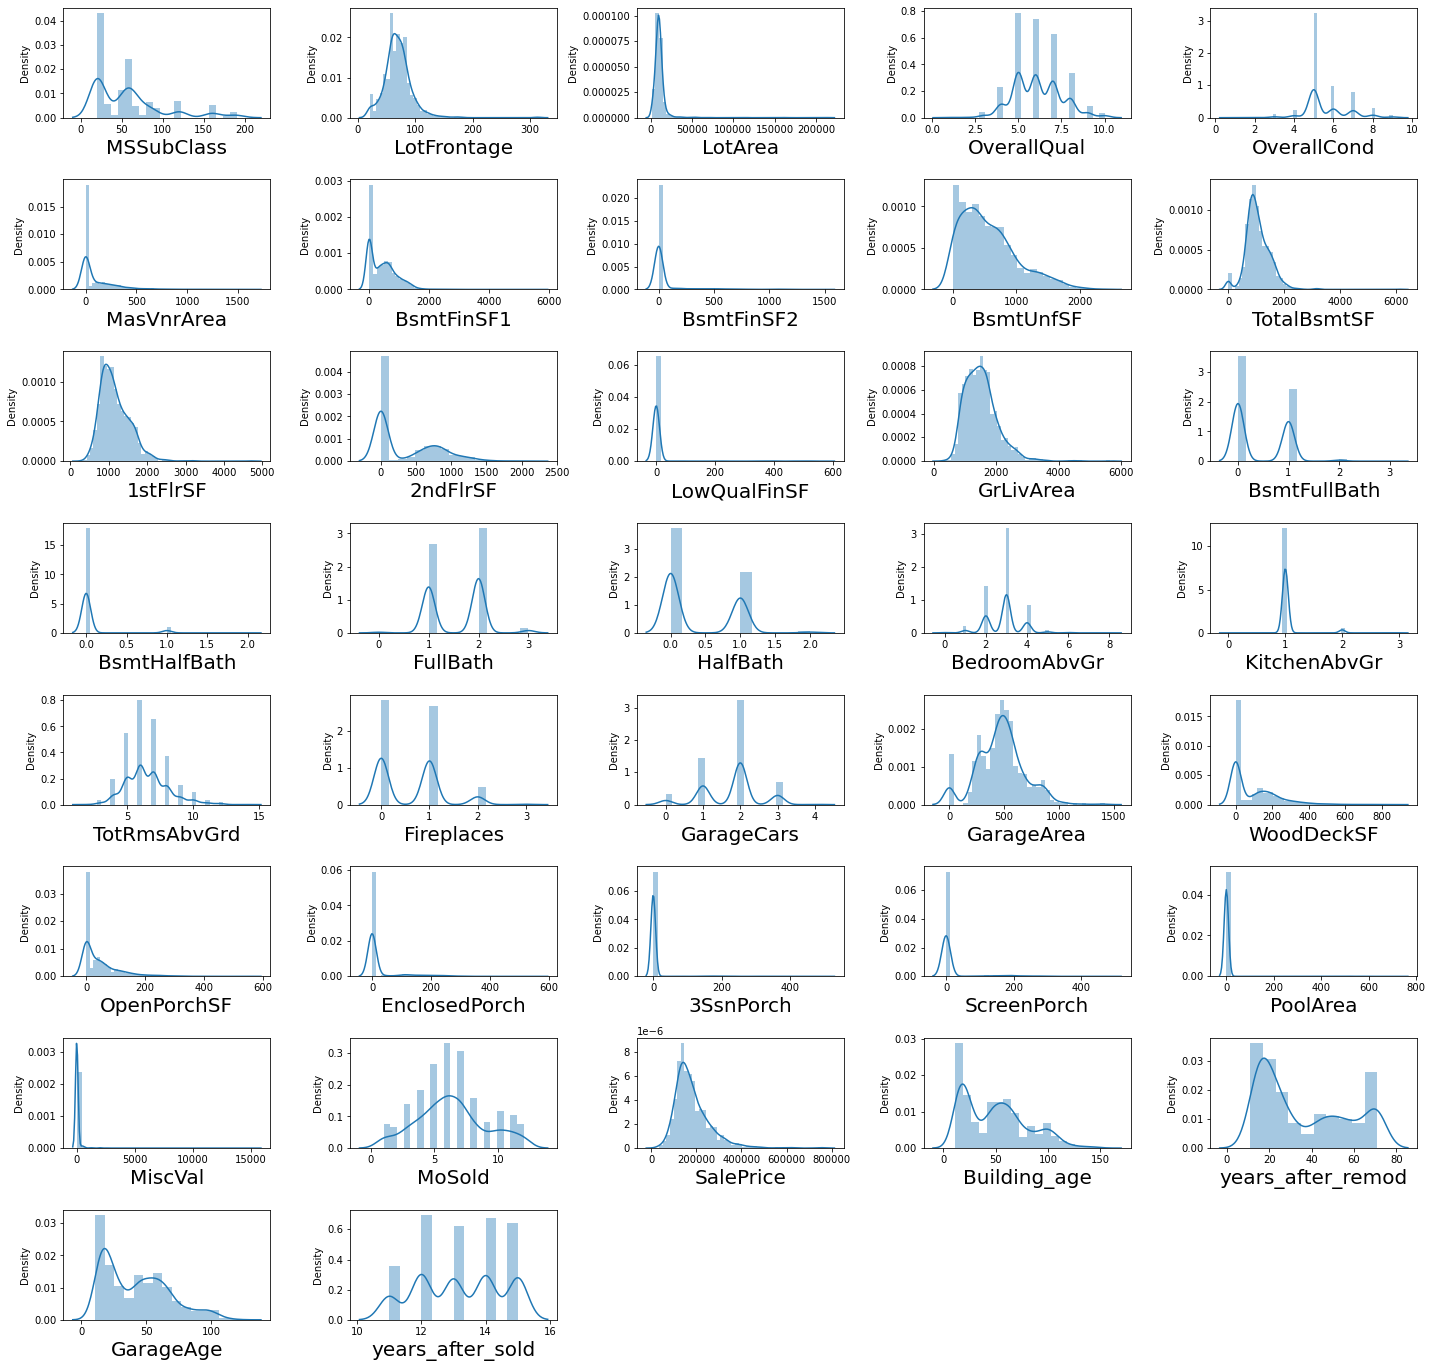

In [16]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,40))
plotnumber = 1
for column in num_data:
    if plotnumber <=81:
        ax = plt.subplot(17,5,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

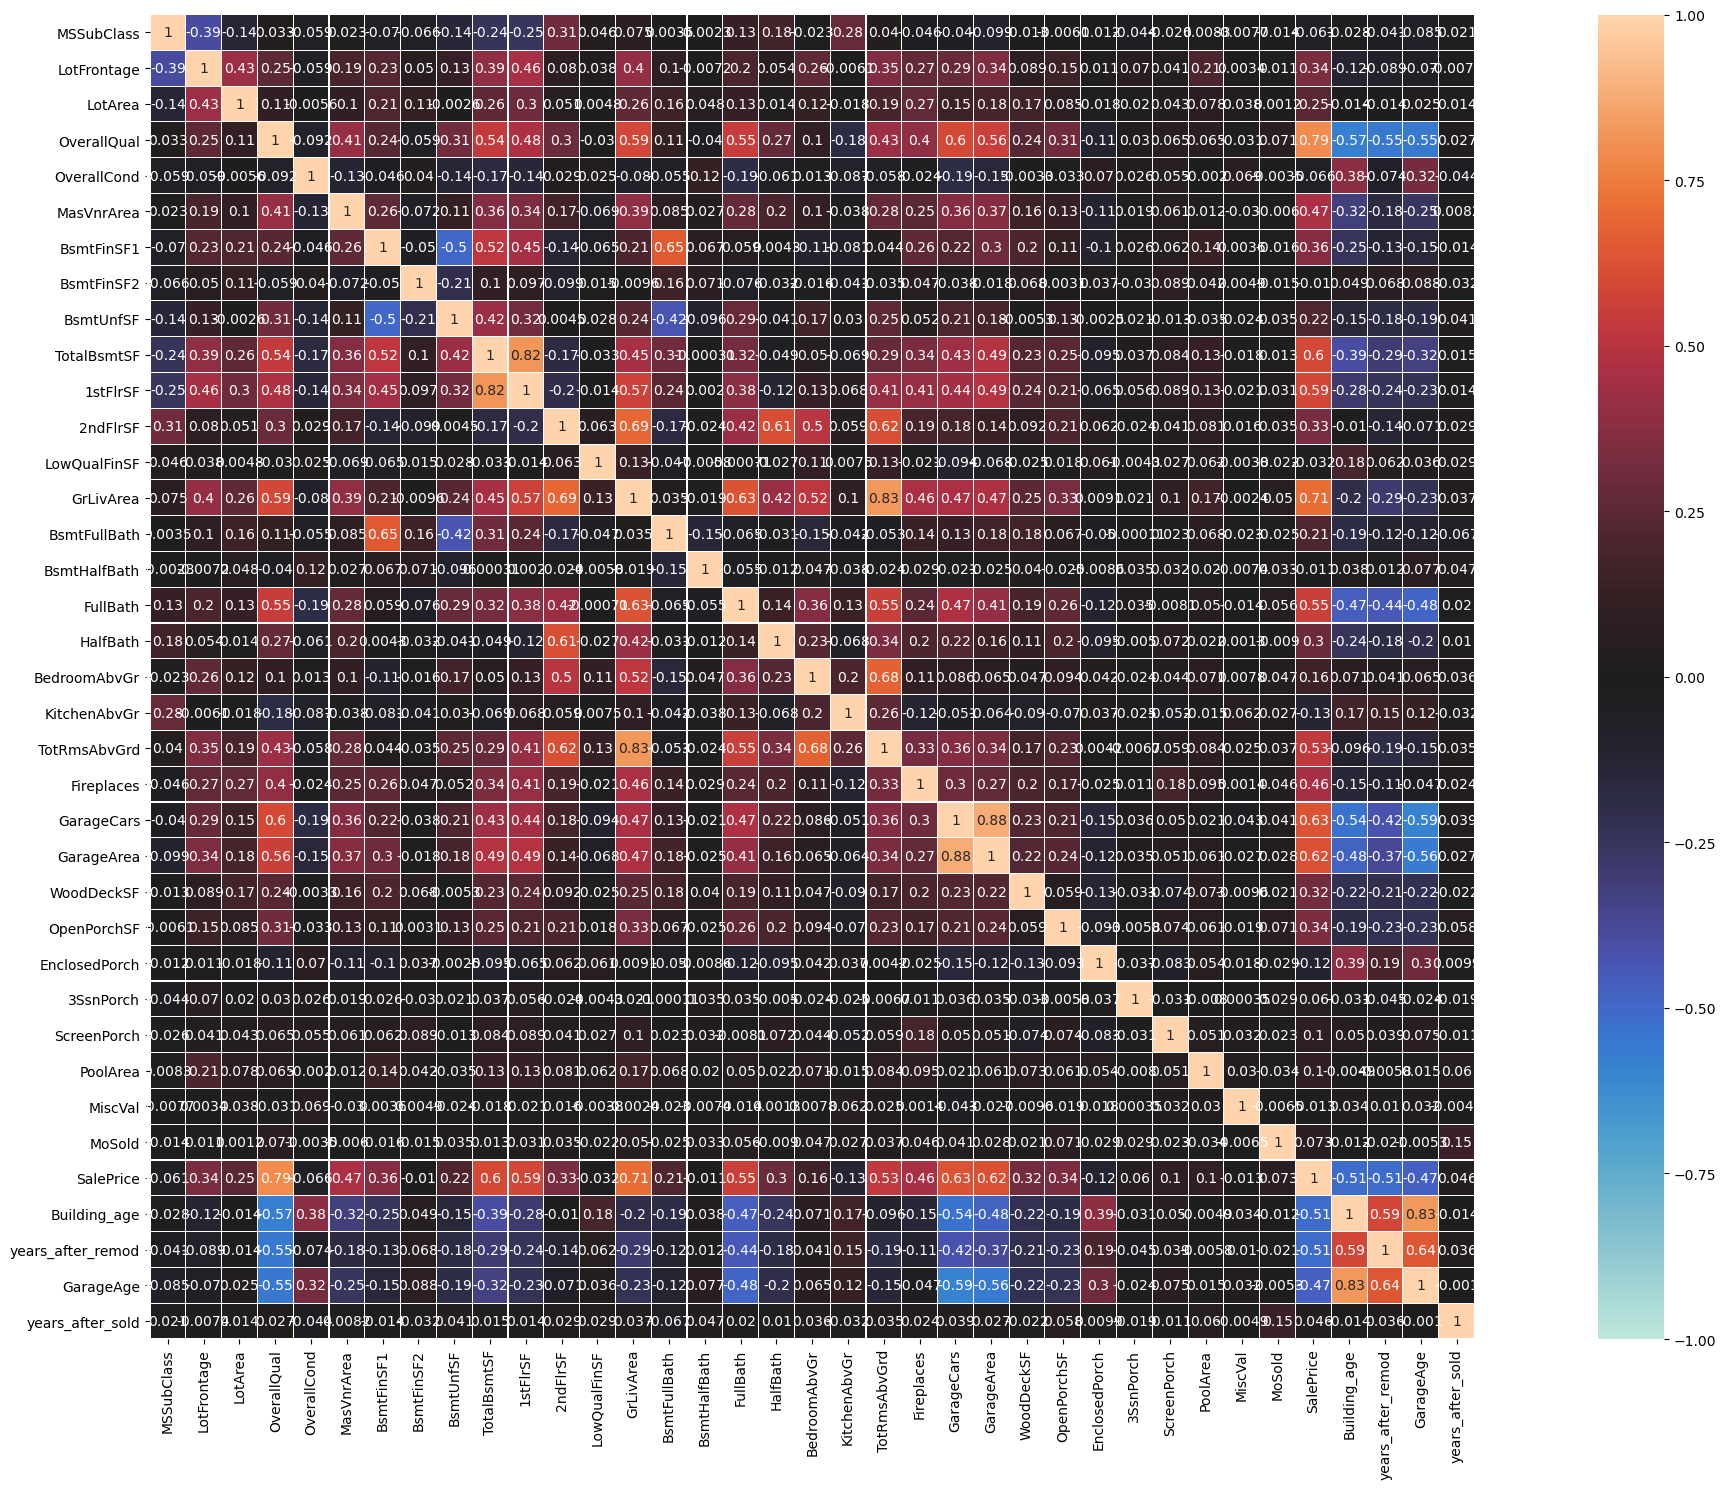

In [17]:
#Heat Map for checking the correlation

plt.style.use('default')
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

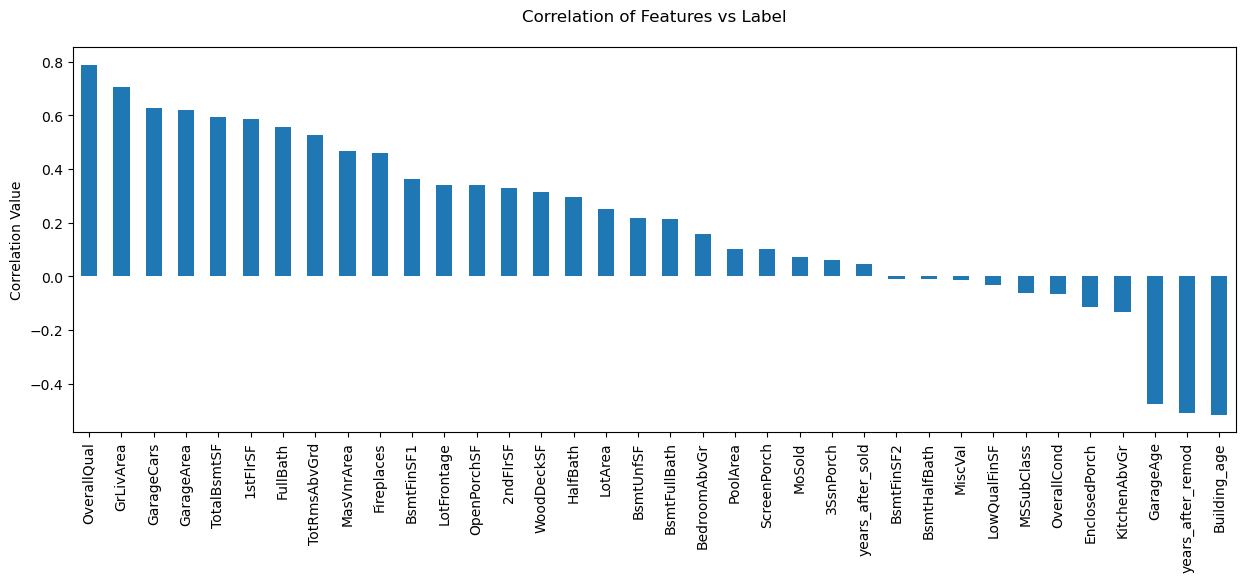

In [18]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['SalePrice'].sort_values( ascending = False).drop('SalePrice').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value")
plt.show()

EDA

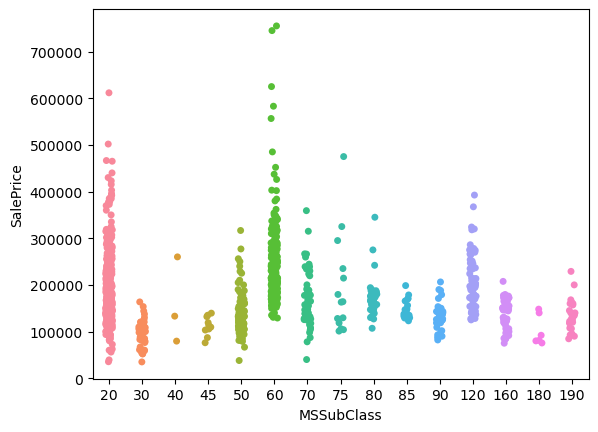

In [19]:
sns.stripplot(x = "MSSubClass", y = 'SalePrice', data = df)
plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

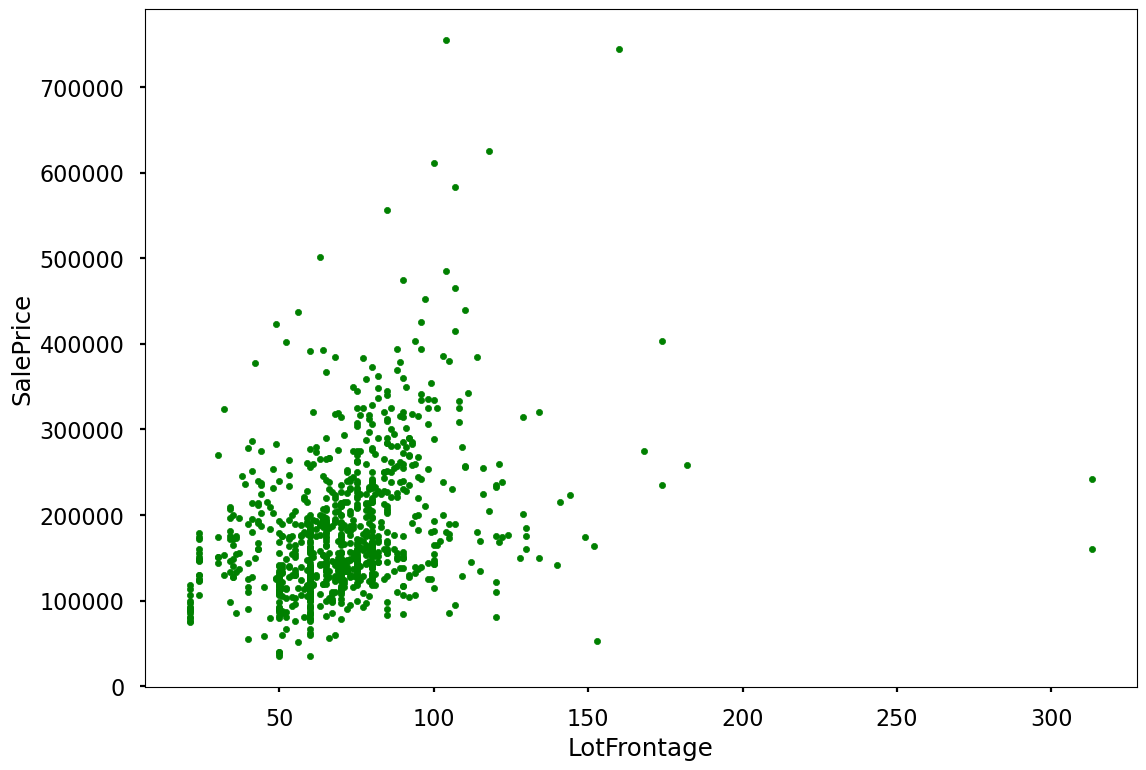

In [20]:
plt.style.use('seaborn-poster')
df.plot(kind='scatter', x='LotFrontage', y='SalePrice', color='g')   

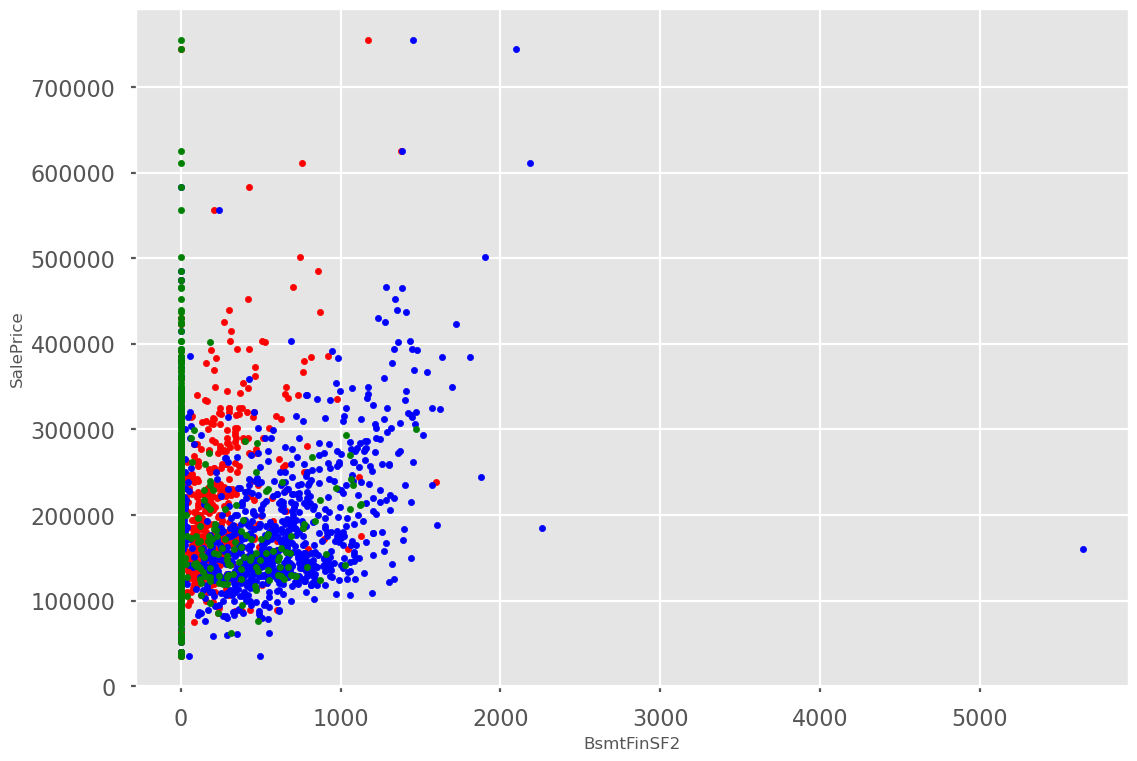

In [21]:
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='MasVnrArea', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='BsmtFinSF1', y='SalePrice', color='b', ax=ax1)
ax3 = df.plot(kind='scatter', x='BsmtFinSF2', y='SalePrice', color='g', ax=ax1)

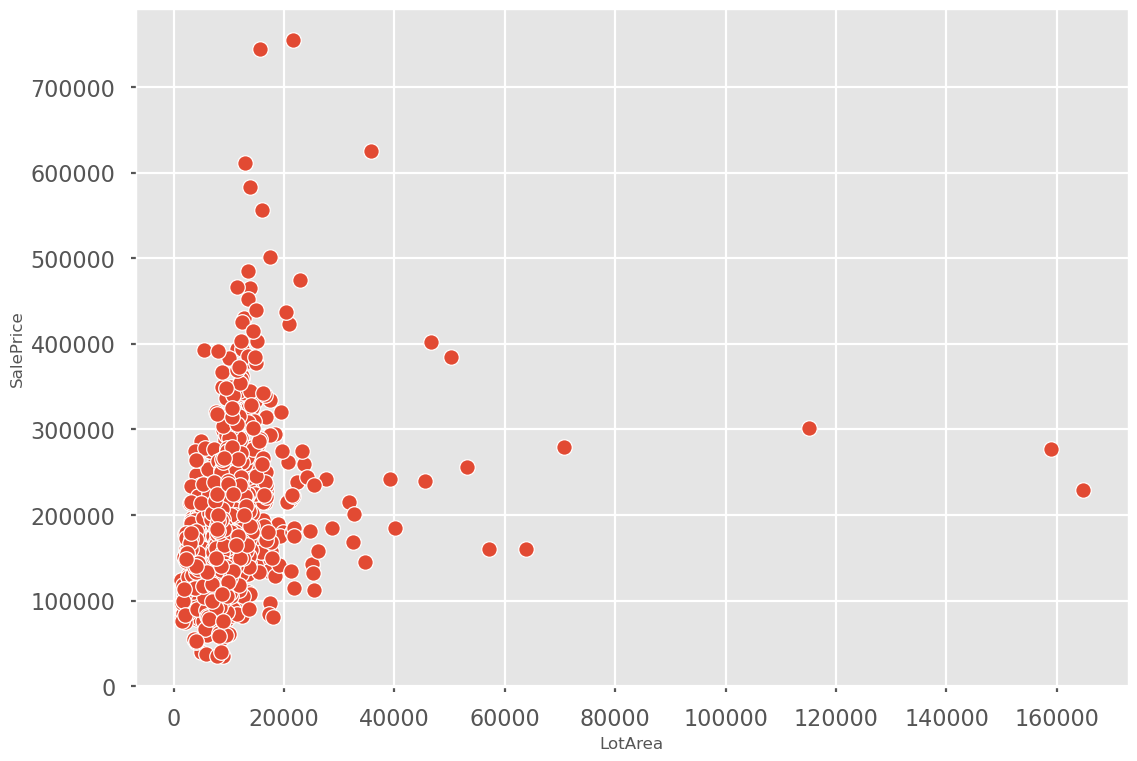

In [22]:
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df)
plt.show()

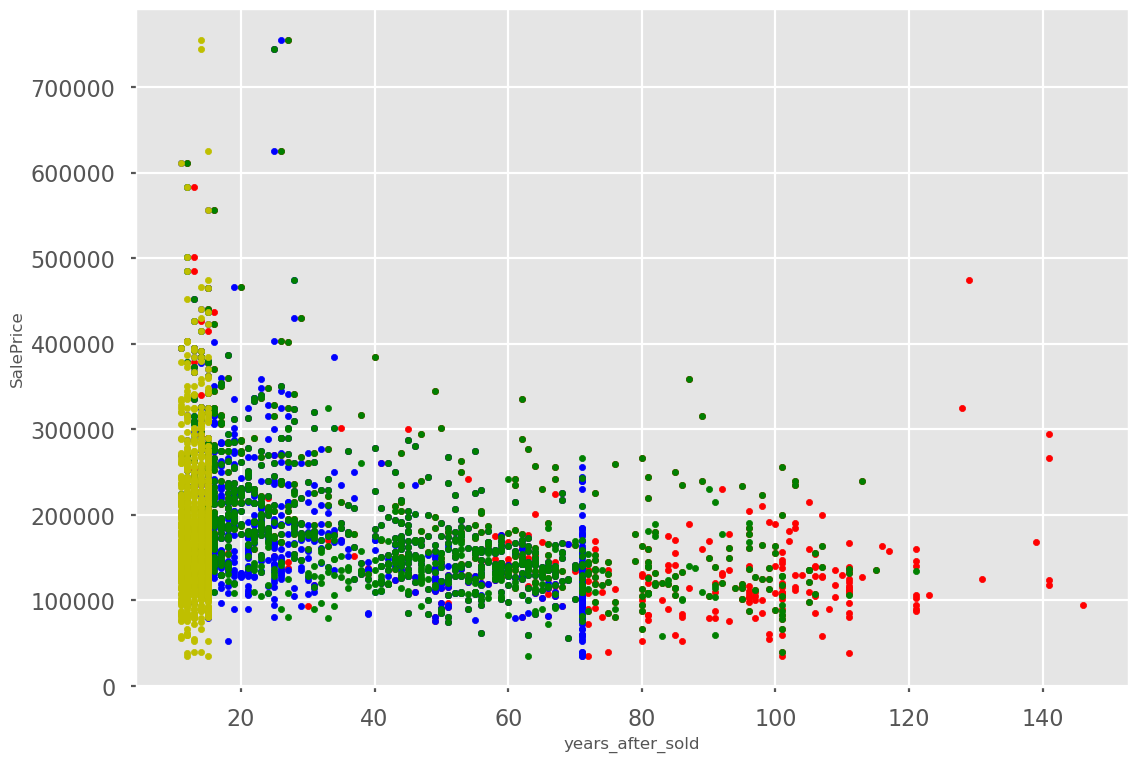

In [23]:
plt.style.use('seaborn-poster')
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='Building_age', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='years_after_remod', y='SalePrice', color='b', ax=ax1)
ax3 = df.plot(kind='scatter', x='GarageAge', y='SalePrice', color='g', ax=ax1)
ax4 = df.plot(kind='scatter', x='years_after_sold', y='SalePrice', color='y', ax=ax1)

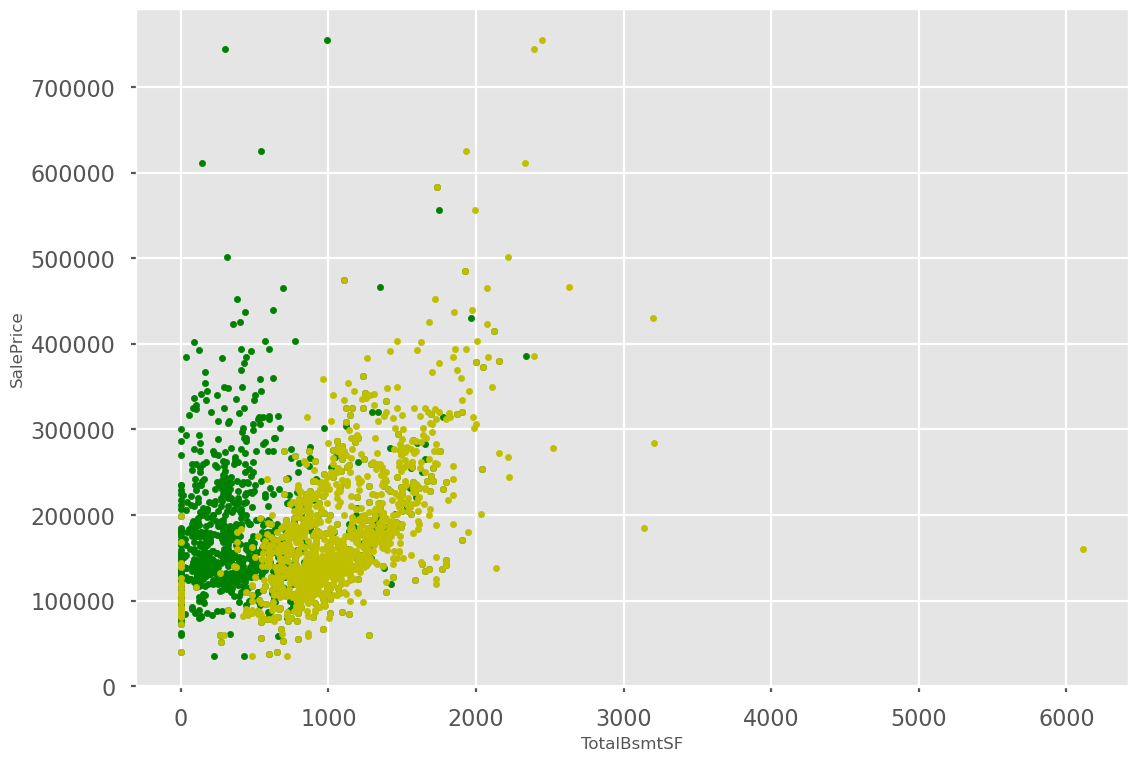

In [24]:
ax1 = df.plot(kind='scatter', x='BsmtUnfSF', y='SalePrice', color='g')
ax2 = df.plot(kind='scatter', x='TotalBsmtSF', y='SalePrice', color='y', ax=ax1)

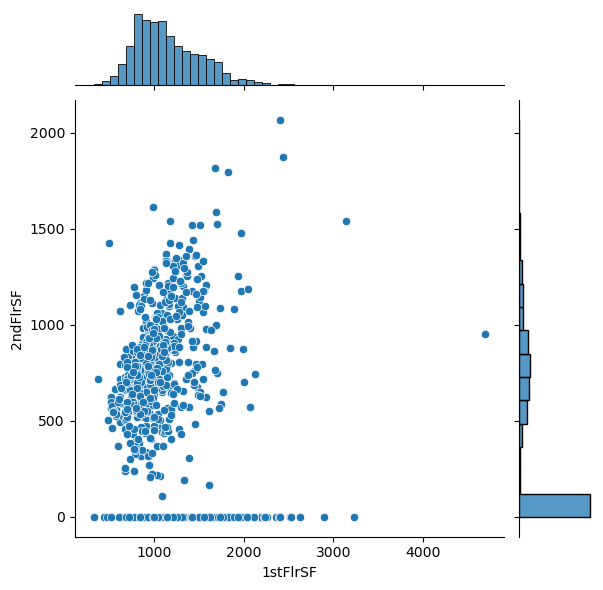

In [25]:
plt.style.use('default')
sns.jointplot(data=df, x="1stFlrSF", y="2ndFlrSF")
plt.show()

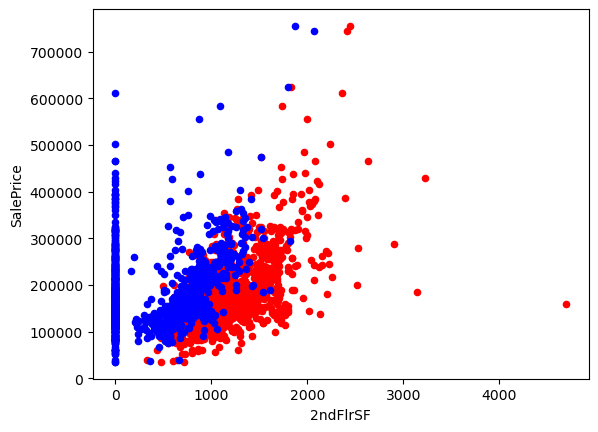

In [26]:
plt.style.use('seaborn-muted')
ax1 = df.plot(kind='scatter', x='1stFlrSF', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='2ndFlrSF', y='SalePrice', color='b', ax=ax1)

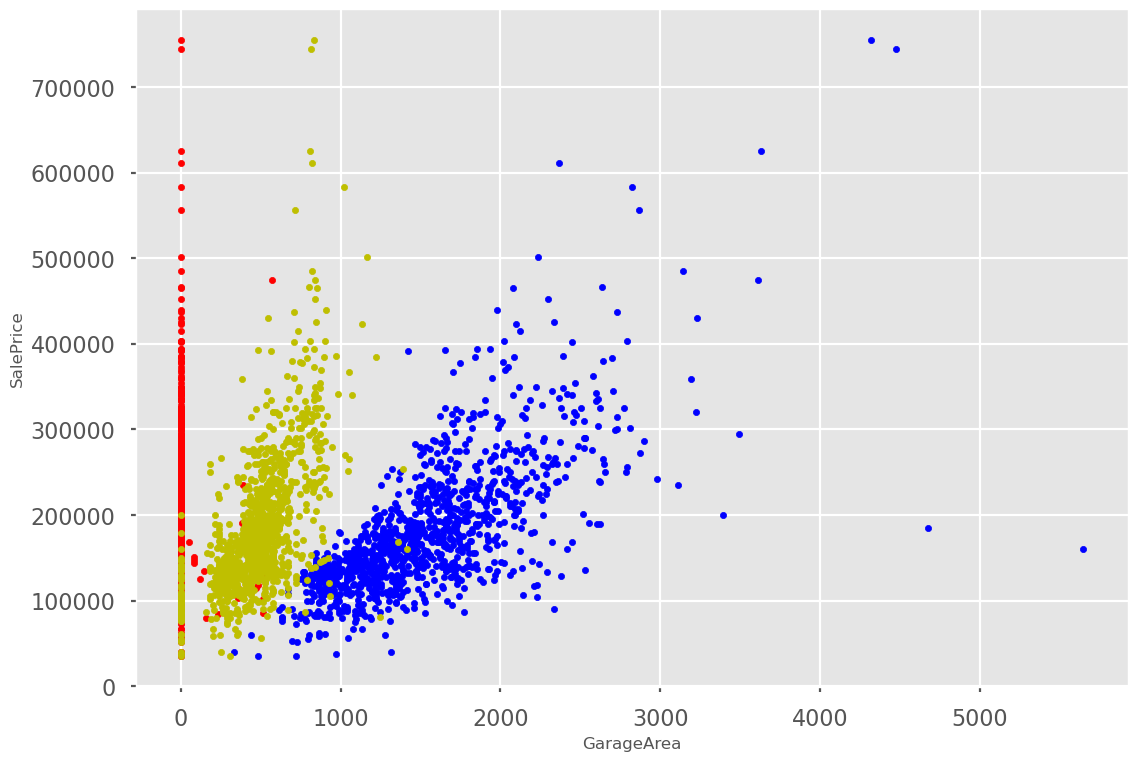

In [27]:
plt.style.use('seaborn-poster')
plt.style.use('ggplot')
ax1 = df.plot(kind='scatter', x='LowQualFinSF', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='GrLivArea', y='SalePrice', color='b', ax=ax1)
ax2 = df.plot(kind='scatter', x='GarageArea', y='SalePrice', color='y', ax=ax1)

In [28]:
col=['OverallQual','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageCars','MoSold']

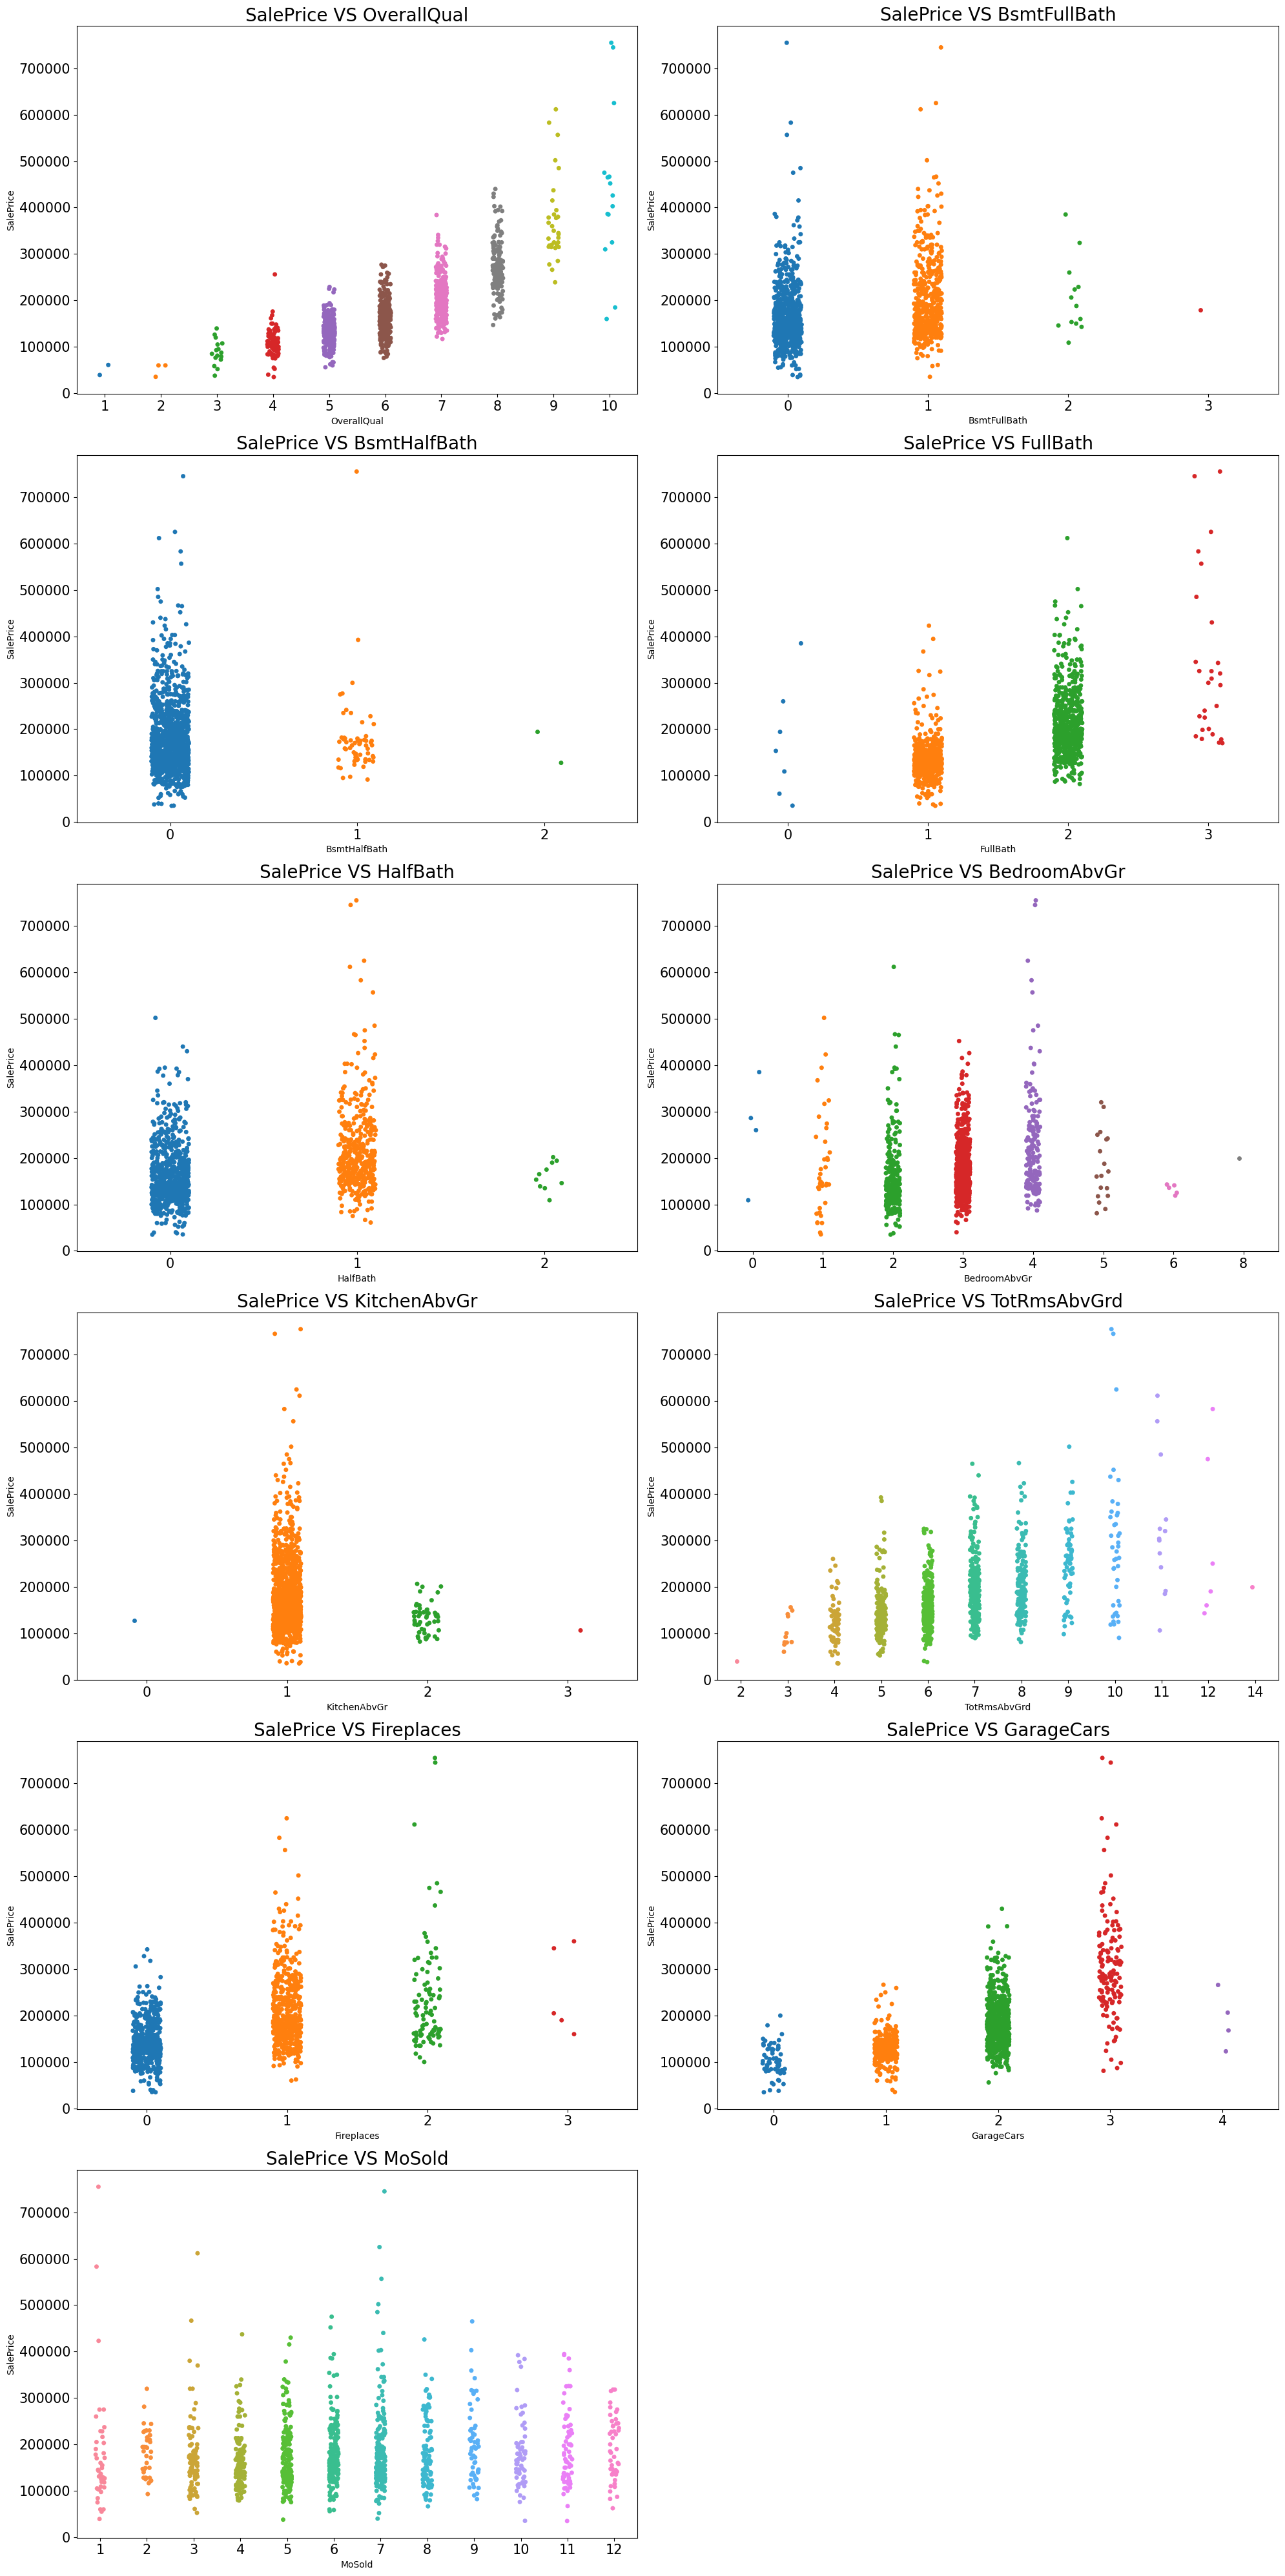

In [29]:
plt.style.use('default')
plt.figure(figsize=(20,40))
for i in range(len(col)):
    plt.subplot(6,2,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col[i]])
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()


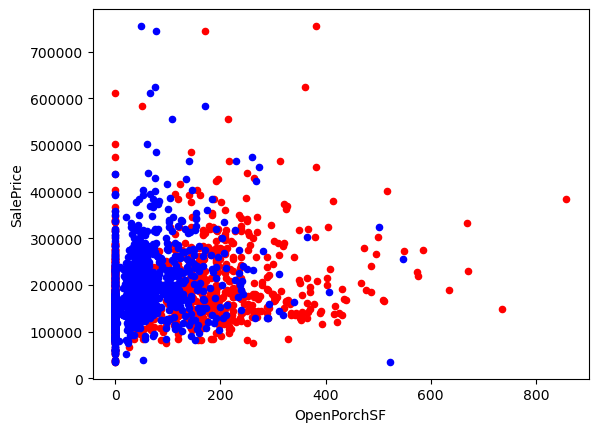

In [30]:
ax1 = df.plot(kind='scatter', x='WoodDeckSF', y='SalePrice', color='r')    
ax2 = df.plot(kind='scatter', x='OpenPorchSF', y='SalePrice', color='b', ax=ax1)

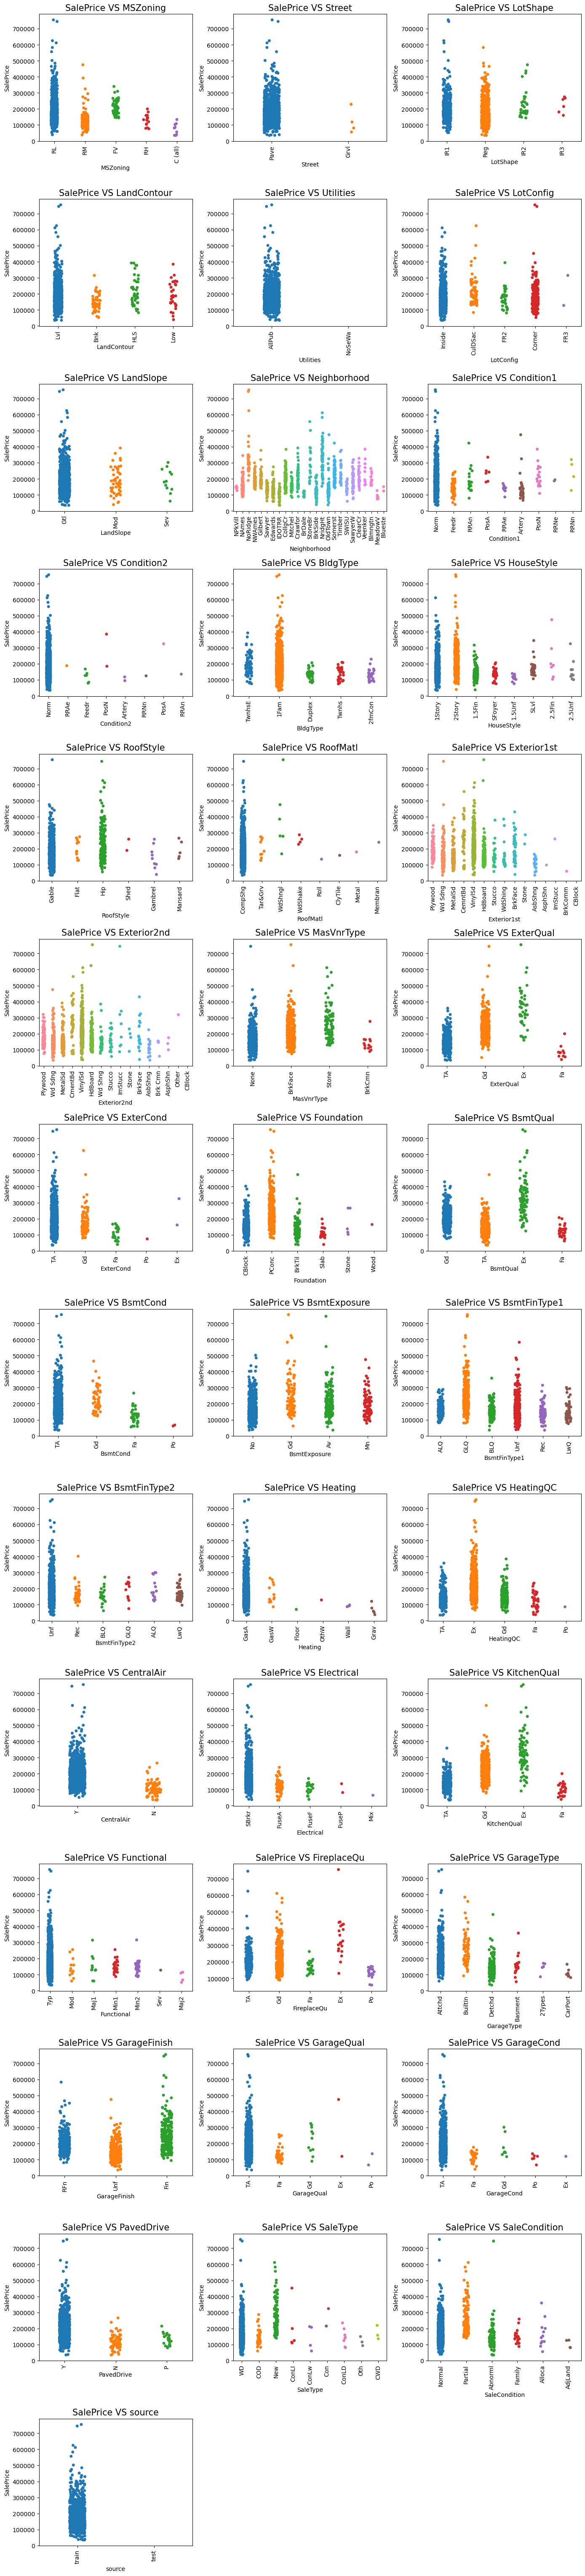

In [31]:
col1 = df.select_dtypes(exclude=[np.number]).columns
plt.style.use('default')
plt.figure(figsize=(14,65))
for i in range(len(col1)):
    plt.subplot(15,3,i+1)
    sns.stripplot(y=df['SalePrice'],x=df[col1[i]])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=15)
    plt.xticks(rotation = 90)  
    plt.tight_layout()

In [32]:
df['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

In [33]:
#dropping unwanted columns
df.drop(columns = ['LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

Above columns are having almost 90% of entries with the value 0, so i decided to drop these columns.

In [34]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(df[col].value_counts())
        print('='*30)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [35]:
df.drop(columns = ['Utilities','Heating'], inplace = True)

In [36]:
df.describe().T

count           mean           std      min        25%  \
MSSubClass         1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage        1201.0      70.049958     24.284752     21.0      59.00   
LotArea            1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual        1460.0       6.099315      1.382997      1.0       5.00   
OverallCond        1460.0       5.575342      1.112799      1.0       5.00   
MasVnrArea         1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1         1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2         1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF          1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF        1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF           1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF           1460.0     346.992466    436.528436      0.0       0.00   
GrLivArea          1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath       1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath       1460.0       0.057534      0.238753      0.0       0.00   
FullBath           1460.0       1.565068      0.550916      0.0       1.00   
HalfBath           1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr       1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr       1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd       1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces         1460.0       0.613014      0.644666      0.0       0.00   
GarageCars         1460.0       1.767123      0.747315      0.0       1.00   
GarageArea         1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF         1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF        1460.0      46.660274     66.256028      0.0       0.00   
MoSold             1460.0       6.321918      2.703626      1.0       5.00   
SalePrice          1168.0  181477.005993  79105.586863  34900.0  130375.00   
Building_age       1460.0      49.732192     30.202904     11.0      21.00   
years_after_remod  1460.0      36.134247     20.645407     11.0      17.00   
GarageAge          1379.0      42.493836     24.689725     11.0      19.00   
years_after_sold   1460.0      13.184247      1.328095     11.0      12.00   

                        50%        75%       max  
MSSubClass             50.0      70.00     190.0  
LotFrontage            69.0      80.00     313.0  
LotArea              9478.5   11601.50  215245.0  
OverallQual             6.0       7.00      10.0  
OverallCond             5.0       6.00       9.0  
MasVnrArea              0.0     166.00    1600.0  
BsmtFinSF1            383.5     712.25    5644.0  
BsmtFinSF2              0.0       0.00    1474.0  
BsmtUnfSF             477.5     808.00    2336.0  
TotalBsmtSF           991.5    1298.25    6110.0  
1stFlrSF             1087.0    1391.25    4692.0  
2ndFlrSF                0.0     728.00    2065.0  
GrLivArea            1464.0    1776.75    5642.0  
BsmtFullBath            0.0       1.00       3.0  
BsmtHalfBath            0.0       0.00       2.0  
FullBath                2.0       2.00       3.0  
HalfBath                0.0       1.00       2.0  
BedroomAbvGr            3.0       3.00       8.0  
KitchenAbvGr            1.0       1.00       3.0  
TotRmsAbvGrd            6.0       7.00      14.0  
Fireplaces              1.0       1.00       3.0  
GarageCars              2.0       2.00       4.0  
GarageArea            480.0     576.00    1418.0  
WoodDeckSF              0.0     168.00     857.0  
OpenPorchSF            25.0      68.00     547.0  
MoSold                  6.0       8.00      12.0  
SalePrice          163995.0  215000.00  755000.0  
Building_age           48.0      67.00     149.0  
years_after_remod      27.0      54.00      

Filling missing values

In [37]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.mean()))
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
for col in ['FireplaceQu','GarageType','GarageFinish','BsmtFinType2','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']:
    df[col] = df[col].fillna('None')
for col in ['GarageAge','MasVnrArea']:
      df[col] = df[col].fillna(0)   

In [38]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

Outliers

In [39]:
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for col in df.columns:
    if df[col].dtypes != 'object':
      percentile = df[col].quantile([0.01,0.98]).values
      df[col][df[col]<=percentile[0]]=percentile[0]
      df[col][df[col]>=percentile[1]]=percentile[1]

Devide train and test datasets

In [40]:
#Divide into test and train:
df_train = df.loc[df['source']== 'train']
df_test = df.loc[df['source']== 'test']
test.reset_index(drop=True,inplace=True)

In [41]:
df_train.drop(columns = 'source', inplace = True)
df_test.drop(columns = 'source', inplace = True)

In [42]:
#lets saperate data into label and features
x = df_train.drop(columns = 'SalePrice')
y = df_train["SalePrice"]

In [43]:
x.skew()

MSSubClass           1.409001
LotFrontage          0.069815
LotArea              1.205411
OverallQual          0.139627
OverallCond          0.565815
MasVnrArea           1.858884
ExterQual            0.965940
ExterCond            1.227778
BsmtQual            -1.310393
BsmtCond            -3.568301
BsmtFinSF1           0.638761
BsmtFinSF2           3.527845
BsmtUnfSF            0.770865
TotalBsmtSF          0.150128
HeatingQC           -0.495647
1stFlrSF             0.631423
2ndFlrSF             0.716110
GrLivArea            0.617880
BsmtFullBath         0.355224
BsmtHalfBath         3.954345
FullBath             0.166941
HalfBath             0.494488
BedroomAbvGr        -0.326248
KitchenAbvGr         4.374289
KitchenQual          0.368347
TotRmsAbvGrd         0.501357
Fireplaces           0.552677
FireplaceQu          0.082978
GarageCars          -0.434745
GarageArea          -0.131175
GarageQual          -3.532481
GarageCond          -3.530060
WoodDeckSF           1.065427
OpenPorchS

In [44]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [45]:
x.skew()

MSSubClass           0.232724
LotFrontage          0.069815
LotArea             -0.720663
OverallQual          0.139627
OverallCond          0.007022
MasVnrArea           0.510251
ExterQual            0.822429
ExterCond            0.458843
BsmtQual            -1.310393
BsmtCond            -3.568301
BsmtFinSF1          -0.387019
BsmtFinSF2           2.486009
BsmtUnfSF           -1.089227
TotalBsmtSF          0.150128
HeatingQC           -0.495647
1stFlrSF            -0.017926
2ndFlrSF             0.288398
GrLivArea           -0.060929
BsmtFullBath         0.355224
BsmtHalfBath         3.954345
FullBath             0.166941
HalfBath             0.494488
BedroomAbvGr        -0.326248
KitchenAbvGr         4.374289
KitchenQual          0.368347
TotRmsAbvGrd        -0.100027
Fireplaces           0.158186
FireplaceQu          0.082978
GarageCars          -0.434745
GarageArea          -0.131175
GarageQual          -3.532481
GarageCond          -3.530060
WoodDeckSF           0.126580
OpenPorchS

In [46]:
num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

In [47]:
cat_data

MSZoning Street LotShape LandContour LotConfig LandSlope Neighborhood  \
0          RL   Pave      IR1         Lvl    Inside       Gtl      NPkVill   
1          RL   Pave      IR1         Lvl    Inside       Mod        NAmes   
2          RL   Pave      IR1         Lvl   CulDSac       Gtl      NoRidge   
3          RL   Pave      IR1         Lvl    Inside       Gtl       NWAmes   
4          RL   Pave      IR1         Lvl       FR2       Gtl       NWAmes   
...       ...    ...      ...         ...       ...       ...          ...   
1163       RL   Pave      IR1         Lvl    Inside       Gtl       Sawyer   
1164       RL   Pave      Reg         Lvl    Inside       Gtl      Edwards   
1165       RL   Pave      Reg         Lvl       FR2       Gtl      NPkVill   
1166  C (all)   Pave      Reg         Lvl    Inside       Gtl       IDOTRR   
1167       RL   Pave      IR1         Lvl    Inside       Gtl      Gilbert   

     Condition1 Condition2 BldgType  ... BsmtFinType1 BsmtFinType2 CentralAir  \
0          Norm       Norm   TwnhsE  ...          ALQ          Unf          Y   
1          Norm       Norm     1Fam  ...          ALQ          Rec          Y   
2          Norm       Norm     1Fam  ...          GLQ          Unf          Y   
3          Norm       Norm     1Fam  ...          BLQ          Unf          Y   
4          Norm       Norm     1Fam  ...          ALQ          Unf          Y   
...         ...        ...      ...  ...          ...          ...        ...   
1163       Norm       Norm     1Fam  ...          BLQ          Unf          Y   
1164      Feedr       Norm     1Fam  ...         None         None          Y   
1165       Norm       Norm    Twnhs  ...          ALQ          Unf          Y   
1166      Feedr       Norm     1Fam  ...          Unf          Unf          N   
1167       Norm       Norm     1Fam  ...          GLQ          Unf          Y   

     Electrical Functional GarageType GarageFinish PavedDrive SaleType  \
0         SBrkr        Typ     Attchd          RFn          Y       WD   
1         SBrkr        Typ     Attchd          Unf          Y       WD   
2         SBrkr        Typ     Attchd          Unf          Y       WD   
3         SBrkr        Typ     Attchd          RFn          Y      COD   
4         SBrkr        Typ     Attchd          Fin          Y       WD   
...         ...        ...        ...          ...        ...      ...   
1163      SBrkr        Typ     Detchd          Unf          Y       WD   
1164      SBrkr        Typ     Detchd          Fin          N       WD   
1165      SBrkr        Typ     Attchd          Unf          Y       WD   
1166      SBrkr        Typ     Detchd          Unf          N       WD   
1167      SBrkr        Typ     Attchd          Fin          Y       WD   

     SaleCondition  
0           Normal  
1           Normal  
2           Normal  
3           Normal  
4           Normal  
...            ...  
1163        Normal  
1164        Normal  
1165        Normal  
1166        Normal  
1167        Normal  

[1168 rows x 28 columns]

Applying standard scaler to numerical data

In [48]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

Encoding

In [49]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [50]:
num

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0       1.426932    -2.006131 -1.309687    -0.072810    -0.501684   -0.802123   
1      -1.131696     1.265407  1.253518     1.419154     0.457894   -0.802123   
2       0.426259     1.108910  0.184431     0.673172    -0.501684   -0.802123   
3      -1.131696     1.787065  0.563945    -0.072810     0.457894    1.566151   
4      -1.131696     0.550157  1.364379    -0.072810     1.289119    1.055488   
...          ...          ...       ...          ...          ...         ...   
1163   -1.131696     0.192749  0.161724    -0.818792    -0.501684    0.526891   
1164   -1.131696    -0.195234 -0.085540    -1.564774    -0.501684   -0.802123   
1165    1.844218    -2.438361 -2.818820    -0.072810     0.457894   -0.802123   
1166    0.648050    -1.082052 -0.155663    -1.564774    -1.636625   -0.802123   
1167    0.426259     0.476533 -0.325515    -0.072810    -0.501684   -0.802123   

      ExterQual  ExterCond  BsmtQual  BsmtCond  ...  GarageArea  GarageQual  \
0     -0.747738  -0.196101  0.586914  0.117460  ...   -0.164072    0.286577   
1      1.090393   2.524450 -0.553711  1.899193  ...    0.716342    0.286577   
2      1.090393  -0.196101  0.586914  0.117460  ...   -0.091110    0.286577   
3     -0.747738  -0.196101  0.586914  0.117460  ...    0.351529    0.286577   
4      1.090393  -0.196101  0.586914  0.117460  ...    0.268839    0.286577   
...         ...        ...       ...       ...  ...         ...         ...   
1163  -0.747738   2.524450 -0.553711  0.117460  ...   -0.942339    0.286577   
1164  -0.747738  -0.196101 -3.975588 -5.227737  ...    0.225061    0.286577   
1165  -0.747738  -0.196101  0.586914  0.117460  ...   -0.164072    0.286577   
1166  -0.747738  -3.703500 -0.553711  0.117460  ...   -1.088264    0.286577   
1167   1.090393  -0.196101  0.586914  0.117460  ...   -0.392688    0.286577   

      GarageCond  WoodDeckSF  OpenPorchSF    MoSold  Building_age  \
0       0.281408   -0.957307     1.415031 -1.617822     -0.162969   
1       0.281408    0.739471     1.419525  1.361470      0.040585   
2       0.281408    1.044340     1.204466 -0.128176     -0.841482   
3       0.281408   -0.957307     1.175155 -1.990233     -0.196894   
4       0.281408    1.154578    -1.063249 -0.128176     -0.196894   
...          ...         ...          ...       ...           ...   
1163    0.281408   -0.957307    -1.063249 -1.617822      0.142362   
1164    0.281408   -0.957307     1.064693 -0.500587      0.753024   
1165    0.281408    0.766662    -1.063249  0.244236     -0.162969   
1166   -1.135334   -0.957307     0.800776  0.244236      1.736868   
1167    0.281408    0.819715     0.951206 -0.128176     -1.045036   

      years_after_remod  GarageAge  years_after_sold  
0              0.421463   0.358529          0.605487  
1              0.710324   0.574679          0.605487  
2             -0.589553  -0.437262          0.605487  
3              0.373319   0.358529         -1.651563  
4             -0.733984   0.358529         -0.899213  
...                 ...        ...               ...  
1163           0.854755   0.574679         -1.651563  
1164          -0.878415  -0.704499         -0.899213  
1165           0.421463   0.390868         -0.899213  
1166           1.673197   1.688154         -0.146863  
1167          -0.878415  -0.704499          1.357837  

[1168 rows x 39 columns]

combining categorical and numerical data

In [51]:
X = pd.concat([num, cat_data], axis = 1)

In [52]:
X

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
0       1.426932    -2.006131 -1.309687    -0.072810    -0.501684   -0.802123   
1      -1.131696     1.265407  1.253518     1.419154     0.457894   -0.802123   
2       0.426259     1.108910  0.184431     0.673172    -0.501684   -0.802123   
3      -1.131696     1.787065  0.563945    -0.072810     0.457894    1.566151   
4      -1.131696     0.550157  1.364379    -0.072810     1.289119    1.055488   
...          ...          ...       ...          ...          ...         ...   
1163   -1.131696     0.192749  0.161724    -0.818792    -0.501684    0.526891   
1164   -1.131696    -0.195234 -0.085540    -1.564774    -0.501684   -0.802123   
1165    1.844218    -2.438361 -2.818820    -0.072810     0.457894   -0.802123   
1166    0.648050    -1.082052 -0.155663    -1.564774    -1.636625   -0.802123   
1167    0.426259     0.476533 -0.325515    -0.072810    -0.501684   -0.802123   

      ExterQual  ExterCond  BsmtQual  BsmtCond  ...  BsmtFinType1  \
0     -0.747738  -0.196101  0.586914  0.117460  ...           0.0   
1      1.090393   2.524450 -0.553711  1.899193  ...           0.0   
2      1.090393  -0.196101  0.586914  0.117460  ...           2.0   
3     -0.747738  -0.196101  0.586914  0.117460  ...           1.0   
4      1.090393  -0.196101  0.586914  0.117460  ...           0.0   
...         ...        ...       ...       ...  ...           ...   
1163  -0.747738   2.524450 -0.553711  0.117460  ...           1.0   
1164  -0.747738  -0.196101 -3.975588 -5.227737  ...           4.0   
1165  -0.747738  -0.196101  0.586914  0.117460  ...           0.0   
1166  -0.747738  -3.703500 -0.553711  0.117460  ...           6.0   
1167   1.090393  -0.196101  0.586914  0.117460  ...           2.0   

      BsmtFinType2  CentralAir  Electrical  Functional  GarageType  \
0              6.0         1.0         4.0         6.0         1.0   
1              5.0         1.0         4.0         6.0         1.0   
2              6.0         1.0         4.0         6.0         1.0   
3              6.0         1.0         4.0         6.0         1.0   
4              6.0         1.0         4.0         6.0         1.0   
...            ...         ...         ...         ...         ...   
1163           6.0         1.0         4.0         6.0         5.0   
1164           4.0         1.0         4.0         6.0         5.0   
1165           6.0         1.0         4.0         6.0         1.0   
1166           6.0         0.0         4.0         6.0         5.0   
1167           6.0         1.0         4.0         6.0         1.0   

      GarageFinish  PavedDrive  SaleType  SaleCondition  
0              2.0         2.0       8.0            4.0  
1              3.0         2.0       8.0            4.0  
2              3.0         2.0       8.0            4.0  
3              2.0         2.0       0.0            4.0  
4              0.0         2.0       8.0            4.0  
...            ...         ...       ...            ...  
1163           3.0         2.0       8.0            4.0  
1164           0.0         0.0       8.0            4.0  
1165           3.0         2.0       8.0            4.0  
1166           3.0         0.0       8.0            4.0  
1167           0.0         2.0       8.0            4.0  

[1168 rows x 67 columns]

Finding best random_state

In [53]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(50,1000):
    x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8993456174383743 on Random State 51


In [54]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = 51)

Building a function for model with evaluation

In [55]:
def BuiltModel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

LinearRegression Model

MAE : 0.08808101081850198
RMSE : 0.11871775395605254
------------------------------
Training r2 Score : 90.63034942549693 %
Testing r2 Score: 89.78361148100221 %
------------------------------

Cross validation score : 85.40621344835768

Accuracy Score - Cross Validation Score : 4.377398032644535


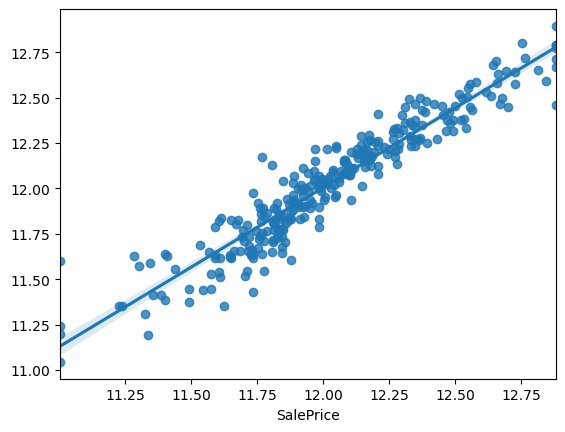

In [56]:
lr = LinearRegression()
BuiltModel(lr)

DecisionTreeRegressor Model

MAE : 0.13143183224302332
RMSE : 0.17720519989540282
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 77.23755126955555 %
------------------------------

Cross validation score : 73.03623226032234

Accuracy Score - Cross Validation Score : 4.201319009233217


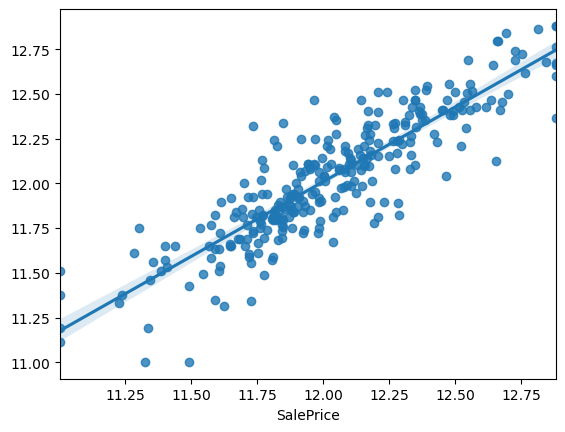

In [57]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
BuiltModel(dt)

RandomForestRegressor Model

MAE : 0.09025377204969622
RMSE : 0.12589718108086229
------------------------------
Training r2 Score : 98.0634634231778 %
Testing r2 Score: 88.51058095318089 %
------------------------------

Cross validation score : 88.05778028938118

Accuracy Score - Cross Validation Score : 0.4528006637997066


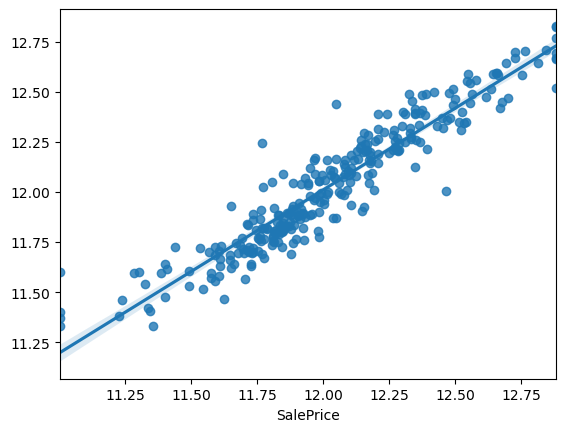

In [58]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
BuiltModel(rf)

XGBRegressor model

MAE : 0.0890879365481817
RMSE : 0.11932061076841524
------------------------------
Training r2 Score : 99.99212624778993 %
Testing r2 Score: 89.67958900466691 %
------------------------------

Cross validation score : 88.03582887635302

Accuracy Score - Cross Validation Score : 1.643760128313886


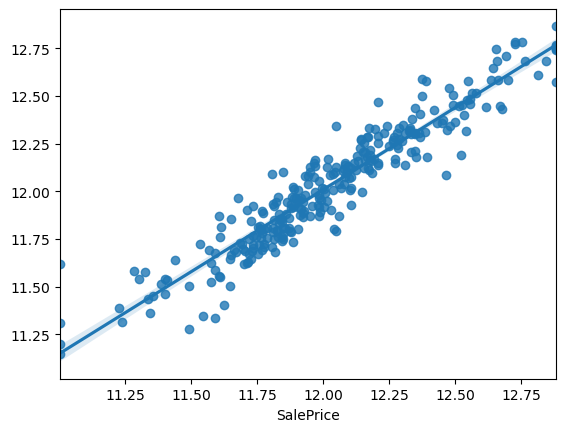

In [59]:
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
BuiltModel(xgb)

ExtraTreesRegressor model

MAE : 0.08850810143302475
RMSE : 0.12220027772020989
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 89.17543523682147 %
------------------------------

Cross validation score : 87.69323132140279

Accuracy Score - Cross Validation Score : 1.4822039154186797


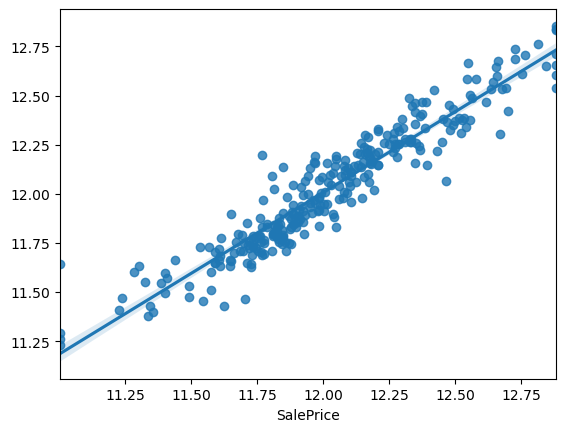

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
BuiltModel(ext)

LGBMRegressor model

MAE : 0.08159192530011566
RMSE : 0.11117570394727563
------------------------------
Training r2 Score : 99.19963481706179 %
Testing r2 Score: 91.04045751125274 %
------------------------------

Cross validation score : 88.42781168398886

Accuracy Score - Cross Validation Score : 2.6126458272638757


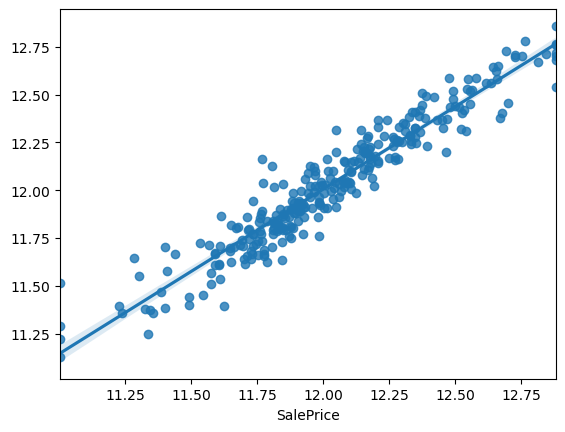

In [61]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
BuiltModel(lgbm)

HyperParameter Tuning

In [62]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [8,9,10,12],
                'n_estimators':[500,700,900,1000],
                'min_samples_split': [2]
                }

Final Model

In [65]:
#lets train and test our final model with best parameters
model = RandomForestRegressor(max_depth = 12, min_samples_split = 2, n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.08886300803567224
RMSE : 0.12294059034114915
------------------------------
 
r2 Score: 89.04388339578519 %


Great we have got improved our accuracy from 88.60% to 88.99% after Hyperparameter tuning

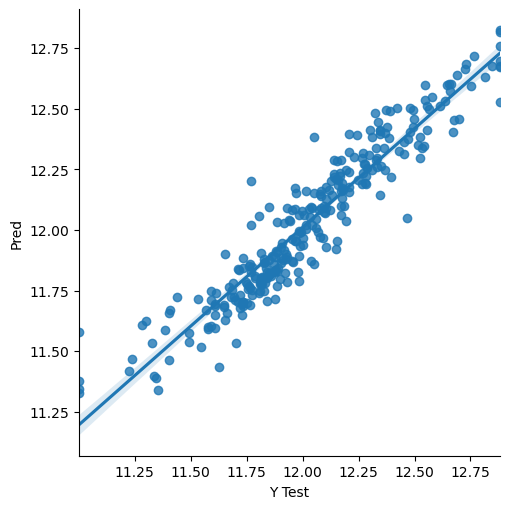

In [66]:
#Lets see final Actual Vs Predicted sample

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

Model Saving

In [67]:
import joblib
joblib.dump(model,"House_price_prediction.pkl")

['House_price_prediction.pkl']

In [68]:
model = joblib.load('House_price_prediction.pkl')

Making predictions for test dataset using final model

In [69]:
df_test.reset_index(inplace=True)

In [70]:
df_test.drop(columns = 'index', inplace = True)

In [71]:
#Lets treat the skewness
for index in df_test.skew().index:
    if df_test.skew().loc[index]>0.5:
        df_test[index]=np.log1p(df_test[index])
        if df_test.skew().loc[index]<-0.5:
            df_test[index]=np.square(df_test[index])

In [72]:
num_data = df_test.select_dtypes(include = [np.number])
cat_data = df_test.select_dtypes(exclude=[np.number])

In [73]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

In [74]:
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [75]:
Test = pd.concat([num, cat_data], axis = 1)

In [76]:

Test.drop(columns = 'SalePrice',inplace = True)

In [77]:
#lets predict the price with our best model
prediction = model.predict(Test)

In [78]:
prediction

array([12.67968448, 12.31789812, 12.42253983, 12.05693758, 12.14859069,
       11.33394784, 11.85333219, 12.56310008, 12.40756753, 12.05403711,
       11.33370793, 11.9221288 , 11.78008432, 12.10325231, 12.53344234,
       11.81452057, 11.65275928, 11.73054704, 12.03685129, 12.2294404 ,
       12.04179394, 11.9218464 , 11.94927459, 11.28059496, 11.545408  ,
       11.75226917, 12.08162902, 11.9042056 , 12.00511912, 11.53822281,
       11.88382768, 12.17240029, 12.36809302, 11.98905275, 11.57144171,
       12.06213021, 12.14624932, 11.71820351, 12.03173311, 11.9223227 ,
       11.60712876, 12.62282776, 12.2194662 , 12.17203824, 11.77063632,
       11.8375492 , 11.7547047 , 11.51892954, 12.25794682, 12.59479261,
       11.94365879, 12.09401985, 11.59120405, 11.52375886, 12.51940583,
       11.68922646, 11.90843711, 12.1695194 , 11.67591286, 12.34881331,
       11.48066116, 12.0393803 , 11.79994256, 11.8686281 , 12.2218058 ,
       11.45198177, 11.90399136, 12.23008038, 11.8398847 , 11.96

In [79]:
#lets make the dataframe for prediction
house_price = pd.DataFrame(prediction, columns=["Price"])

In [80]:
Test = pd.read_csv("test.csv")

In [81]:
Test['SalePrice'] = np.exp(house_price)

In [82]:
Test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0           HLS    AllPub  ...        0    NaN   NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
2           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
3           Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
4           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
..          ...       ...  ...      ...    ...   ...         ...     ...   
287         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
288         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
289         Lvl    AllPub  ...        0    NaN   NaN        Shed     700   
290         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
291         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition      SalePrice  
0        7   2007        WD         Normal  321156.712086  
1        8   2009       COD        Abnorml  223663.532913  
2        6   2009        WD         Normal  248336.468751  
3        7   2009        WD         Normal  172290.550653  
4        1   2008        WD         Normal  188827.786097  
..     ...    ...       ...            ...            ...  
287     10   2008        WD         Normal  239545.366384  
288      2   2008        WD         Normal  136078.373201  
289      3   2010        WD         Normal  146498.444138  
290     10   2006        WD         Normal  164411.693894  
291      6   2006        WD         Normal   97190.525638  

[292 rows x 81 columns]